# Bounding Box Visualizer

In [1]:
try:
    import cv2
except ImportError:
    cv2 = None

COLORS = [
    "#6793be", "#990000", "#00ff00", "#ffbcc9", "#ffb9c7", "#fdc6d1",
    "#fdc9d3", "#6793be", "#73a4d4", "#9abde0", "#9abde0", "#8fff8f", "#ffcfd8", "#808080", "#808080",
    "#ffba00", "#6699ff", "#009933", "#1c1c1c", "#08375f", "#116ebf", "#e61d35", "#106bff", "#8f8fff",
    "#8fff8f", "#dbdbff", "#dbffdb", "#dbffff", "#ffdbdb", "#ffc2c2", "#ffa8a8", "#ff8f8f", "#e85e68",
    "#123456", "#5cd38c", "#1d1f5f", "#4e4b04", "#495a5b", "#489d73", "#9d4872", "#d49ea6", "#ff0080",
    "#6793be", "#990000", "#fececf", "#ffbcc9", "#ffb9c7", "#fdc6d1",
    "#fdc9d3", "#6793be", "#73a4d4", "#9abde0", "#9abde0", "#8fff8f", "#ffcfd8", "#808080", "#808080",
    "#ffba00", "#6699ff", "#009933", "#1c1c1c", "#08375f", "#116ebf", "#e61d35", "#106bff", "#8f8fff",
    "#8fff8f", "#dbdbff", "#dbffdb", "#dbffff", "#ffdbdb", "#ffc2c2", "#ffa8a8", "#ff8f8f", "#e85e68",
    "#123456", "#5cd38c", "#1d1f5f", "#4e4b04", "#495a5b", "#489d73", "#9d4872", "#d49ea6", "#ff0080" 
]

def hex_to_rgb(color_hex):
    color_hex = color_hex.lstrip('#')
    color_rgb = tuple(int(color_hex[i:i+2], 16) for i in (0, 2, 4))
    return color_rgb

def annotate_image(image, detection):
    """ Annotate images with object detection results
    # Arguments:
        image: numpy array representing the image used for detection
        detection: `DetectionResult` result from SKIL on the same image
    # Return value:
        annotated image as numpy array
    """
    if cv2 is None:
        raise Exception("OpenCV is not installed.")
        
    objects = detection.get('objects')
    if objects:
        for detect in objects:
            confs = detect.get('confidences')
            max_conf = max(confs)
            max_index = confs.index(max_conf)
            classes = detect.get('predictedClasses')
            max_class = classes[max_index]
            class_number = detect.get('predictedClassNumbers')[max_index]
            
            h = detect.get('height')
            w = detect.get('width')
            center_x = detect.get('centerX')
            center_y = detect.get('centerY')          
            
            color_hex = COLORS[class_number]
            b,g,r = hex_to_rgb(color_hex)
            color_rgb = (r,g,b)
            
            # bounding box
            xmin, ymin = int(center_x - w/2), int(center_y - h/2)
            xmax, ymax = int(center_x + w/2), int(center_y + h/2)
            upper = (xmin, ymin)
            lower = (xmax, ymax)
                        
            cv2.rectangle(image, lower, upper, color_rgb, thickness=3)
            
            # bounding box label: class_name: confidence 
            text = max_class + ": " + str(int(100*max(confs)))+"%"
            
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 0.7
        
            # get text size
            size = cv2.getTextSize(text, font, fontScale+0.1, thickness=2)
            text_width = size[0][0]
            text_height = size[0][1]
            
            # text-box background
            cv2.rectangle(image, 
                          (xmin-2, ymin),
                          (xmin+text_width, ymin-35), color_rgb, thickness=-1)
            
            cv2.putText(image, text, (xmin, ymin-10), font, fontScale, color=0, thickness=2)
            
    return image

{
    "predictedClassNumbers": [
        7,
        2,
        5,
        0,
        3,
        6,
        62,
        12,
        39,
        67
    ],
    "predictedClasses": [
        "truck",
        "car",
        "bus",
        "person",
        "motorbike",
        "train",
        "tvmonitor",
        "parking meter",
        "bottle",
        "cell phone"
    ],
    "confidences": [
        0.6679658,
        0.32458264,
        0.0057245484,
        0.00025993204,
        0.00017069715,
        0.00013948459,
        0.00010358589,
        0.0001003403,
        5.5740995e-05,
        5.4393808e-05
    ],
    "height": 216.0,
    "centerY": 239.0,
    "centerX": 41.0,
    "width": 90.0
}


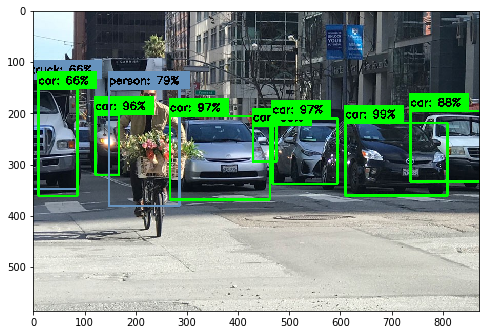

1: [truck, 0.66797]
2: [car, 0.66478]
3: [car, 0.96426]
4: [person, 0.79216]
5: [car, 0.97738]
6: [car, 0.99196]
7: [car, 0.97779]
8: [car, 0.99004]
9: [car, 0.88215]


In [2]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

with open('detections/img-5.json') as FILE:
    detections = json.load(FILE)

print(json.dumps(detections['objects'][0], indent=4))


image = annotate_image(cv2.imread("images/img-5.jpg"), detections)

cv2.imwrite('images/annotated.jpg', image)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image.shape

for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))

In [3]:
len(COLORS)

84